# Web Mapping Data Modification

This section is revolved around editing code from online resources and using them for further analysis with either Mapbox or CARTO.  Thank you for reading.

In [1]:
#STANDARD GEOGRAPHIC MODULES
#Importing numpy allowing for mathematicl operations
import numpy as np
#Pandas importing which allow to edit Dataframe data sets in csv and xlsx
import pandas as pd
#Geopandas allows for GeoDataframe and polygon rendering for SHP objects
import geopandas as gpd
# pysal Python Spatial Analysis Library allows for chropleth mapping
import pysal as ps
#Seaborn is used to use techniques such as 
import seaborn as sns
# matplot allows for graphs to be created for morans I and XY graphs
import matplotlib.pyplot as plt
#DBSCAN method for noise and main points for point method
from sklearn.cluster import dbscan
# reducing the datasets from a large amount to a usable amount
from functools import reduce
# allowing interactive and fixed elements on a HTML envrionment for Python
from ipywidgets import interact, fixed

#Choropleth and LISA CREATION
#allowing for matplotinline creation without object creation
%matplotlib inline
#moran plotting weighted attributes for each variable for standarization
from pysal.lib import weights
# morans ESDA for plotting and achieveing Moran values
from pysal.explore import esda
# for LISA and spatial autocorrelation plotting of points in a LSOA
from pysal.viz.splot.esda import moran_scatterplot, lisa_cluster,plot_local_autocorrelation
#used for background maps for graph creation
import contextily as ctx

#K MEAN SECTION
# from sklearn.cluster import KMeans 
from sklearn.cluster import KMeans 
# Principal component analysis (PCA) which reduces SVD's to a . single dimension for graphs
from sklearn.decomposition import PCA
#allowing to plot a set amount of colours passed in for aesthetical graph
from matplotlib import colors as mcolors 
#allowing for mathemtical components with basic Python
import math 

#3D GRAPH CREATION
#colour map import from matplot graph tool
from matplotlib import cm 
# MATPLOT3D Axes which allows for ZYX graphs
from mpl_toolkits.mplot3d import Axes3D 

#random seed creates a random number prediction for 123
np.random.seed(123)

#detection of lISA in a graph
from pysal.viz.splot.esda import plot_local_autocorrelation

In [2]:
#CSV AND SHP files for IMD (Index of Multiple Deprivation) calculation



#Data from Council tax brackets used for with housing  price range
# Link to data-set: https://data.cdrc.ac.uk/dataset/cdrc-2015-council-tax-bands-geodata-pack-liverpool-e08000012
councilTax_path = '../councilTaxBands/shapefiles/E08000012.shp'

# merseyside police dataset that uses points for crime ratio
# Link to data-set: https://data.police.uk/data/
mo_path = '../MerseysidePoliceRecords/2019-09-merseyside-outcomes.csv'

#health deprivation measuring health rating throughout the country
# Link to data-set: https://opendatacommunities.org/slice?dataset=http%3A%2F%2Fopendatacommunities.org%2Fdata%2Fsocietal-wellbeing%2Fimd2019%2Findices&http%3A%2F%2Fopendatacommunities.org%2Fdef%2Fontology%2Fcommunities%2Fsocietal_wellbeing%2Fimd%2Findices=http%3A%2F%2Fopendatacommunities.org%2Fdef%2Fconcept%2Fgeneral-concepts%2Fimd%2Fhealthdeprivdisability&http%3A%2F%2Fpurl.org%2Flinked-data%2Fcube%23measureType=http%3A%2F%2Fopendatacommunities.org%2Fdef%2Fontology%2Fcommunities%2Fsocietal_wellbeing%2Fimd%2FscoreObs
healthdep_path ='societal-wellbeing_imd2019_indices.csv'

#population growth per LSOA through the uk and allows for possitive and negative values
#Link to data-set: https://www.ons.gov.uk/economy/environmentalaccounts/datasets/ratiooflandconsumptiongrowthratetopopulationgrowthratebycountryandlowerlayersuperoutputarea
persongrowthratio_path = 'landtopopulationgrowth.xlsx'

#employed/unemployed people per LSOA in England
# Link to data-set http://infuse2011.ukdataservice.ac.uk/InFuseWiz.aspx?cookie=openaccess
employmentRate_path = 'Data_AGE_ECOACT_UNIT.csv'

#education rating per LSOA in England
# Link to data-set https://opendatacommunities.org/slice?dataset=http%3A%2F%2Fopendatacommunities.org%2Fdata%2Fsocietal-wellbeing%2Fimd2019%2Findices&http%3A%2F%2Fopendatacommunities.org%2Fdef%2Fontology%2Fcommunities%2Fsocietal_wellbeing%2Fimd%2Findices=http%3A%2F%2Fopendatacommunities.org%2Fdef%2Fconcept%2Fgeneral-concepts%2Fimd%2Feducskilltraindepriv&http%3A%2F%2Fpurl.org%2Flinked-data%2Fcube%23measureType=http%3A%2F%2Fopendatacommunities.org%2Fdef%2Fontology%2Fcommunities%2Fsocietal_wellbeing%2Fimd%2FscoreObs
educationRate_path  = 'educationscoreLSOA.csv'

# income path rating for LSOA Liverpool
# Link to data-set https://data.cdrc.ac.uk/dataset/cdrc-2016-individual-income-estimates-lep-geodata-pack-lcr-e37000022
income_path = './E37000022/spatial/E37000022.shp'

#Entire sets are used as they are all percentages into the total Deprivation rate that the 
# Ministry of Housing, Communities and Local Government use.

In [3]:
#Council tax bracket dataset which uses the tax brackets for liverpool as 
#defined with: https://liverpool.gov.uk/media/1357456/council-tax-guide_ver_10_070319.pdf
# setting the index so joins and merges can be done on other datasets
councilTBracket = gpd.read_file(councilTax_path).set_index('LSOA11CD', drop=False)
# Band is A Up to £40,000 which is the ratio we will use from that 
#compared to all houses that are in a band
councilTBracket['Bands_Ratio'] = councilTBracket.apply(lambda row: (row['BAND_A'])/row['All_Bands'], axis=1)

# A subgroup of measurement is the financial accessibility of a household which will be measured using the 
# house tax rate bands for the Liverpool City Council. As funding is the main goal a ratio between all bands and 
# Band A was chosen as it had a reduction in charge and used other bands funding for disability and health 
# funding with these households (Liverpool City Council, 2019). 


In [4]:
#Health data set stops any error lines since the data set had empty NaN values
healthdep = pd.read_csv(healthdep_path, error_bad_lines=False)
#finding the ratio for health deprivation which is a point in total IMD Deprivation.
healthdep['LSOA11CD'] = healthdep['LSOA11CD'].map(lambda x: x.lstrip('http://opendatacommunities.org/id/geography/administration/lsoa/'))
#Setting the index for the healthdeprivation to allow a join later on
healthdep =healthdep.set_index('LSOA11CD')
#GET the largest value of health so a ratio can be made from 0 to 1 so every variable 
# is in the same max values
maxHealth = healthdep[' Healthrating'].max()
#Ratio of current health rating with the maximum achieved in England
healthdep[' Healthrating'] =  healthdep[' Healthrating'] /maxHealth

In [5]:
#Population growth reading into a pd file as it is not a SHP file and does not contain a geometry
pgrowthr = pd.read_excel(persongrowthratio_path)
#Values initially had spaces between certain values so this function could not join with other sets
pgrowthr['LSOA11CD'] =   pgrowthr['LSOA11CD'].str.strip()
#Setting index for future joins and not allowing for duplicate collumns
pgrowthr = pgrowthr.set_index('LSOA11CD')

In [6]:
#Reading CSV file for employee values from the 2011 England Census classic data collection
employeer = pd.read_csv(employmentRate_path)
#Find the ratio of unemployed users with total checked with survey for ratio
employeer['unEmployment_Ratio'] = employeer.apply(lambda row: (row['Einactive'])/(row['Einactive']+row['EActive']), axis=1)
#Set index for future joins to find total deprivation
employeer =employeer.set_index('LSOA11CD')

In [7]:
#Read the education rate data set achieved from the ODC to a CSV file
eduRate = pd.read_csv(educationRate_path, error_bad_lines=False)
#LSOA collumn had copyrighted information so it was removed on each row to match other sets
eduRate['LSOA11CD'] = eduRate['LSOA11CD'].map(lambda x: x.lstrip('http://opendatacommunities.org/id/geography/administration/lsoa/'))
#Setting the index later on after the row was mapped properly so the index can perform a join
eduRate =eduRate.set_index('LSOA11CD')
# Finding the ratio of the education score compared to other sets within the graph
eduRate['EducationScore'] = eduRate.apply(lambda row: (row['EducationScore']/eduRate['EducationScore'].max()), axis=1)

In [8]:
#Reading income data set for Liverpool that uses the different income brackers for a user
#Using Rank 1 = £0.00  and Rank 2 = £0.01 to £5,000.00 which is £10,000 less than the minimum wage
incomeRate = gpd.read_file(income_path)
#Getting Array list of all collumn name String
names = incomeRate.columns.tolist()
#remaining collumn name for inner join capabilities latter
names[names.index('lsoa11cd')] = 'LSOA11CD'
#enforcing new collumn names
incomeRate.columns = names
#setting index for on join on
incomeRate = incomeRate.set_index('LSOA11CD')
#Create ratio for Users earning less than £10,000 and 0 as the data isalready given in a ratio
incomeRate['lowestIncomebracket'] = incomeRate.apply(lambda row: ((row['rank_1']+row['rank_2'] )), axis=1)
#Remove geo location as Counciltax has geometry and a pandas clash exception will occour
incomeRate = incomeRate.drop(columns=['geometry'])

In [9]:
# Create array of  Dataframs for simple concat function, more time efficient than merge
dfsArray = [councilTBracket, healthdep, pgrowthr, employeer, eduRate, incomeRate] #incomeRate

In [10]:
#Filling all empty row values with nan_value
nan_value = 0
# Create PD called DeprivationDataset  concatting all the data with an inner join
DeprivationDataset = pd.concat(dfsArray, join='inner', axis=1).fillna(nan_value)

In [11]:
#Drop all irrelevent sections such as . specified values for Bands as ratio had been established
DepSpecified = DeprivationDataset.drop(['BAND_A', 'BAND_B', 'BAND_C', 'BAND_D',  'BAND_E',  'BAND_F',  'BAND_G',  'BAND_H',  'BAND_I'], axis=1)
#Drop goverment 2011 . statistic variables
DepSpecified  = DepSpecified.drop(['Reference area','CDU_ID','GEO_LABEL', 'GEO_TYPE','EActive', 'Einactive' ,'GEO_TYP2'], axis=1)
# Remove bands tax bracket information from table so functions can run faster 
#with less collumns
DepSpecified  = DepSpecified.drop(['LSOA name', 'All_Bands', 'rank_1','rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6', 'rank_7', 'rank_8', 'rank_9', 'no_info', ' Reference area'], axis=1)
#creating a geometry object that can be created on a graph
DepGeometry = DepSpecified
#removing geomotry information so k-means on all clusters can bedone
DepSpecified = DepSpecified.drop(['geometry', 'LSOA11CD'], axis=1) 

In [12]:

#Using the english government information for the ratio analysis to create a deprivation rating after
# K-Means tuplets ratio comarison has been made a general skewe has . been shown to correlate values.
# AS RATIOS ARE BETWEEN 0-1 the *0.135 is the percentage to take into consideration and as teh values
#have . the same bound the percentages will make an impact.
DepGeometry['DeprivationRate'] = DepGeometry.apply(lambda row: (row['EducationScore']*0.135
                                                                + row['Bands_Ratio']*0.093
                                                                + row['unEmployment_Ratio']*0.225
                                                                + row['lowestIncomebracket']*0.225
                                                                + row[' Healthrating']*0.135
                                                                + row['populationRatio']*0.093)
                                                                , axis=1)

In [13]:
DepGeometry = DepGeometry.to_crs("EPSG:3857")

RuntimeError: b'no arguments in initialization list'

In [19]:
DepGeometry.head(2)

,LSOA11CD,geometry,Bands_Ratio,Healthrating,populationRatio,unEmployment_Ratio,EducationScore,lowestIncomebracket,DeprivationRate
LSOA11CD,,,,,,,,,
E01006512,E01006512,"POLYGON ((336103.358 389628.58, 336103.416 389...",0.821429,0.245560,0.006007,0.379978,0.155733,0.256,0.274221
E01006513,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38...",0.348148,0.112489,0.027512,0.350706,0.432768,0.347,0.265530


In [20]:
DepGeometry = gpd.GeoDataFrame(DepGeometry, geometry='geometry')

In [24]:
DepGeometry.to_file('MyGeometries.shp', driver='ESRI Shapefile')

In [27]:
councilTBracket.to_file('councilSave.shp', driver='ESRI Shapefile')

In [27]:
DepGeometry.head(2)

,LSOA11CD,geometry,Bands_Ratio,Healthrating,populationRatio,unEmployment_Ratio,EducationScore,lowestIncomebracket,DeprivationRate
LSOA11CD,,,,,,,,,
E01006512,E01006512,"POLYGON ((336103.358 389628.58, 336103.416 389...",0.821429,0.245560,0.006007,0.379978,0.155733,0.256,0.274221
E01006513,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38...",0.348148,0.112489,0.027512,0.350706,0.432768,0.347,0.265530


In [28]:

DepGeometry.to_csv (r'export_dataframe.csv', index = False, header=True)

In [14]:
test = 'danigdsl/danigdsl.shp'

In [15]:
v = gpd.read_file(test)

In [16]:
v.head(2)

,index_of_m,fid,lsoa11cd,lsoa11nm,lsoa11nmw,age_indica,shape_area,shape_leng,lsoa_name_,local_auth,...,living_env,income_dep,income_d_1,children_a,adult_skil,geographic,wider_barr,indoors_su,outdoors_s,geometry
0,30.679,18,E01000011,Barking and Dagenham 016C,Barking and Dagenham 016C,0,233155.657352,2403.754733,Barking and Dagenham 016C,E09000002,...,39.857,0.189,0.362,0.273,0.334,-0.337,6.689,0.652,1.195,POLYGON ((0.08274776947323803 51.5434999119112...
1,39.004,24,E01000017,Barking and Dagenham 009C,Barking and Dagenham 009C,0,415282.819397,3399.901723,Barking and Dagenham 009C,E09000002,...,27.688,0.318,0.293,-0.300,0.403,-0.761,6.045,0.280,0.773,"POLYGON ((0.150347276986134 51.55090787738874,..."


In [57]:
councilTBracket = councilTBracket.to_crs({'init': 'epsg:4326'})

In [58]:

councilTBracket.to_csv (r'export_dataframe.csv', index = False, header=True)

In [17]:
v = v.to_crs({'init': 'epsg:4326'})

In [18]:
v = v.drop(columns=['lsoa11nmw', 'lsoa11nm', 'local_auth', 'income_d_1', 'children_a', 'wider_barr', 'indoors_su', 'outdoors_s', 'index_of_1', 'index_of_2'])

In [68]:

#Using the english government information for the ratio analysis to create a deprivation rating after
# K-Means tuplets ratio comarison has been made a general skewe has . been shown to correlate values.
# AS RATIOS ARE BETWEEN 0-1 the *0.135 is the percentage to take into consideration and as teh values
#have . the same bound the percentages will make an impact.
v['DeprivationRate'] = v.apply(lambda row: (row['education_']*0.135
                                                                + row['living_env']*0.093
                                                                + row['employment']*0.225
                                                                + row['income_sco']*0.225
                                                                + row['health_dep']*0.135
                                                                + row['barriers_t']*0.093
                                                                + row['crime_scor'] *0.093)
                                                                , axis=1)

In [142]:
v.head(2)

,index_of_m,fid,lsoa11cd,lsoa11nm,lsoa11nmw,age_indica,shape_area,shape_leng,lsoa_name_,local_auth,...,living_env,income_dep,income_d_1,children_a,adult_skil,geographic,wider_barr,indoors_su,outdoors_s,geometry
0,30.679,18,E01000011,Barking and Dagenham 016C,Barking and Dagenham 016C,0,233155.657352,2403.754733,Barking and Dagenham 016C,E09000002,...,39.857,0.189,0.362,0.273,0.334,-0.337,6.689,0.652,1.195,POLYGON ((0.08274776947323803 51.5434999119112...
1,39.004,24,E01000017,Barking and Dagenham 009C,Barking and Dagenham 009C,0,415282.819397,3399.901723,Barking and Dagenham 009C,E09000002,...,27.688,0.318,0.293,-0.300,0.403,-0.761,6.045,0.280,0.773,"POLYGON ((0.150347276986134 51.55090787738874,..."


In [100]:
v.head(2)

,index_of_m,fid,lsoa11cd,age_indica,shape_area,shape_leng,lsoa_name_,local_au_1,cartodb_id,income_sco,...,barriers_t,living_env,income_dep,adult_skil,geographic,geometry,DeprivationRate,w_DeprivationRate,significant,quadrant
0,30.679,18,E01000011,0,233155.657352,2403.754733,Barking and Dagenham 016C,Barking and Dagenham,1,0.167,...,52.948,39.857,0.189,0.334,-0.337,POLYGON ((0.08274776947323803 51.5434999119112...,11.757153,0.0,True,4
1,39.004,24,E01000017,0,415282.819397,3399.901723,Barking and Dagenham 009C,Barking and Dagenham,2,0.250,...,45.929,27.688,0.318,0.403,-0.761,"POLYGON ((0.150347276986134 51.55090787738874,...",10.155192,0.0,True,4


In [20]:
te = 'imd2019.csv'

In [21]:
ter = gpd.read_file(te)

In [22]:
ter.head(2)

,geometry,income_score_rate_,fid,lsoa11cd,lsoa11nm,lsoa11nmw,age_indica,shape_area,shape_length,lsoa_name_2011_,...,living_environment_score,income_deprivation_affecting_children_index_idaci_score_rate,income_deprivation_affecting_older_people_idaopi_score_rate_,children_and_young_people_sub_domain_score,adult_skills_sub_domain_score,geographical_barriers_sub_domain_score,wider_barriers_sub_domain_score,indoors_sub_domain_score,outdoors_sub_domain_score,geometry
0,0106000020E61000000100000001030000000100000011...,0.167,18,E01000011,Barking and Dagenham 016C,Barking and Dagenham 016C,0,233155.657352448,2403.75473303492,Barking and Dagenham 016C,...,39.857,0.189,0.362,0.273,0.334,-0.337,6.689,0.652,1.195,0106000020E61000000100000001030000000100000011...
1,0106000020E61000000100000001030000000100000016...,0.25,24,E01000017,Barking and Dagenham 009C,Barking and Dagenham 009C,0,415282.819396973,3399.90172254771,Barking and Dagenham 009C,...,27.688,0.318,0.293,-0.3,0.403,-0.761,6.045,0.28,0.773,0106000020E61000000100000001030000000100000016...


In [23]:
ter = ter.drop(columns=['geometry', 'lsoa11nm', 'lsoa11nmw', 'age_indica', 'shape_area', 'shape_area', 'shape_length', 'lsoa_name_2011_', 'local_authority_district_code_2019_',])

In [24]:
both= v.merge(ter, on='lsoa11cd')

In [25]:
both = both.to_crs({'init': 'epsg:4326'})

In [30]:
both.income_dep

0        0.189
1        0.318
2        0.031
3        0.119
4        0.024
         ...  
32839    0.414
32840    0.492
32841    0.097
32842    0.520
32843    0.436
Name: income_dep, Length: 32844, dtype: float64

In [27]:
both.to_file('savedFinal.shp', driver='ESRI Shapefile')

In [1]:
#Create Queen and rook spatial auto correlation on v with the index variables.
# Method ofconnecting data sets together through the Queen and rook approach from a spatial matrix on 'h_dom' 
#%time w = weights.Queen.from_dataframe(both, idVariable='lsoa11cd')

In [2]:
#Time frame only took 17.2 seconds since dropped the unused values
# standardize the matrix for each row
#w.transform = 'R'

In [34]:
#Create spatial lag with the deprivationrate values with the higher 
# the value meaning the higher the deprivation rating
# W is standardized with the average values of the varaible and its neighbourhoods
both['w_income_dep'] = weights.lag_spatial(w, both['income_dep'])



In [38]:

both.to_csv (r'test.csv', index = False, header=True)

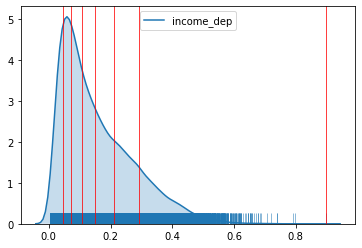

In [44]:
# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(both['income_dep'], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(both['income_dep'], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

In [40]:
from pysal.viz import mapclassify

In [43]:
classi = mapclassify.Quantiles(both['income_dep'], k=10)

In [45]:
classi

               Quantiles                
 
Lower          Upper               Count
        x[i] <= 0.045               4699
0.045 < x[i] <= 0.073               4801
0.073 < x[i] <= 0.106               4679
0.106 < x[i] <= 0.150               4664
0.150 < x[i] <= 0.210               4624
0.210 < x[i] <= 0.293               4703
0.293 < x[i] <= 0.898               4674

In [46]:
lowestQuartile =  both[both.income_dep <= 0.045]

In [48]:
highestQuartile = both[both.income_dep > 0.293]

In [49]:

lowestQuartile.to_csv (r'test.csv', index = False, header=True)

In [52]:
import os
import glob

os.chdir("2020-02")

In [53]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [54]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combinedcsv.csv", index=False, encoding='utf-8-sig')

In [63]:
fileCrime = 'combinedcsv.csv'
os.chdir("../")


In [64]:
crimeRandom = gpd.read_file(fileCrime)

In [65]:
# Set the "seed" so every run produces the generates the same random numbers
np.random.seed(1234)
# Create a sequence of length equal to the number of rows in the table
ri = np.arange(len(crimeRandom))
# Randomly reorganize (shuffle) the values
np.random.shuffle(ri)
# Reindex the table by using only the first 10,000 numbers
# of the (now randomly arranged) sequence
crimeRandom = crimeRandom.iloc[ri[:10000], :]
# Display summary of the new table
crimeRandom.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10000 entries, 429506 to 98629
Data columns (total 13 columns):
Crime ID                 10000 non-null object
Month                    10000 non-null object
Reported by              10000 non-null object
Falls within             10000 non-null object
Longitude                10000 non-null object
Latitude                 10000 non-null object
Location                 10000 non-null object
LSOA code                10000 non-null object
LSOA name                10000 non-null object
Crime type               10000 non-null object
Last outcome category    10000 non-null object
Context                  10000 non-null object
geometry                 0 non-null object
dtypes: object(13)
memory usage: 1.1+ MB


In [66]:

crimeRandom.to_csv (r'crimePoints.csv', index = False, header=True)

In [67]:

highestQuartile.to_csv (r'highest.csv', index = False, header=True)

Now all the data is loaded it can now be edited or viewed via Mapbox for base map styling or CARTO for visual representation.